## Dataset - 1 -> Linearly seperable

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from scipy.stats import multivariate_normal

In [2]:
def load_data(file_path, label):
    data = np.loadtxt(file_path)
    labels = np.full((data.shape[0],), label)
    return data, labels

In [3]:
X1, y1 = load_data(r"Datasets Assignment 2\LS_Group12\Class1.txt", 0)
X2, y2 = load_data(r"Datasets Assignment 2\LS_Group12\Class2.txt", 1)
X3, y3 = load_data(r"Datasets Assignment 2\LS_Group12\Class3.txt", 2)

In [4]:
X = np.vstack((X1, X2, X3))
y = np.concatenate((y1, y2, y3))

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

* Per class mean and covariance

In [6]:
def class_stats(X, y):
    classes = np.unique(y)
    means, covariances = [], []
    for cls in classes:
        X_cls = X[y == cls]
        means.append(np.mean(X_cls, axis=0))
        covariances.append(np.cov(X_cls, rowvar=False))
    return np.array(means), np.array(covariances)

means, covs = class_stats(X_train, y_train)
priors = [np.mean(y_train == i) for i in range(3)]

* initialising bayes classifier

In [7]:
def bayes_classifier(X, means, covs, priors, mode='full', shared=False):
    predictions = []
    if shared:
        if mode == 'full':
            shared_cov = np.mean(covs, axis=0)
        else:
            shared_var = np.mean([np.mean(np.diag(c)) for c in covs])
            shared_cov = np.eye(X.shape[1]) * shared_var
        covs = [shared_cov] * 3
    elif mode == 'diag':
        covs = [np.diag(np.diag(c)) for c in covs]
        
    for x in X:
        probs = [multivariate_normal.pdf(x, mean=means[i], cov=covs[i]) * priors[i] for i in range(3)]
        predictions.append(np.argmax(probs))
    return np.array(predictions)

* defining evaluation matrices

In [8]:
def evaluate(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    prec, rec, f1, _ = precision_recall_fscore_support(y_true, y_pred, zero_division=0)
    
    print(f"\n=== {title} ===")
    print("Confusion Matrix:\n", cm)
    print(f"Accuracy: {acc:.3f}")
    for i in range(3):
        print(f"Class {i} - Precision: {prec[i]:.3f}, Recall: {rec[i]:.3f}, F1-score: {f1[i]:.3f}")
    print(f"Mean Precision: {np.mean(prec):.3f}")
    print(f"Mean Recall: {np.mean(rec):.3f}")
    print(f"Mean F1-score: {np.mean(f1):.3f}")

* visualisation

In [9]:
def plot_decision_boundary(means, covs, priors, mode='full', shared=False, title=''):
    h = 0.1
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = bayes_classifier(grid, means, covs, priors, mode=mode, shared=shared)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='Accent')
    for i, color in zip(range(3), ['red', 'blue', 'green']):
        plt.scatter(X[y == i, 0], X[y == i, 1], label=f'Class {i}', s=15, alpha=0.6, c=color)
    plt.title(f'Decision Boundary - {title}')
    plt.legend()
    plt.grid(True)
    plt.show()
    print(f"Inference: The decision surface for '{title}' shows how the classifier partitions the space.\n")

* running different classifiers


=== Shared Isotropic Covariance (σ²I) ===
Confusion Matrix:
 [[150   0   0]
 [  0 150   0]
 [  0   0 150]]
Accuracy: 1.000
Class 0 - Precision: 1.000, Recall: 1.000, F1-score: 1.000
Class 1 - Precision: 1.000, Recall: 1.000, F1-score: 1.000
Class 2 - Precision: 1.000, Recall: 1.000, F1-score: 1.000
Mean Precision: 1.000
Mean Recall: 1.000
Mean F1-score: 1.000


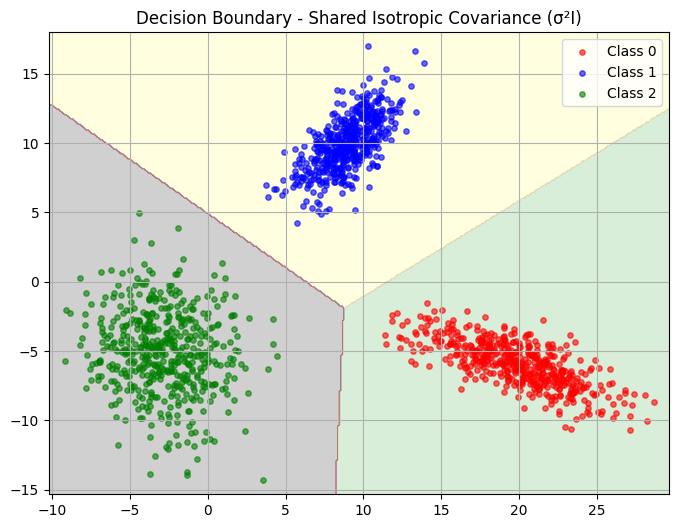

Inference: The decision surface for 'Shared Isotropic Covariance (σ²I)' shows how the classifier partitions the space.


=== Shared Full Covariance (Σ) ===
Confusion Matrix:
 [[150   0   0]
 [  0 150   0]
 [  0   0 150]]
Accuracy: 1.000
Class 0 - Precision: 1.000, Recall: 1.000, F1-score: 1.000
Class 1 - Precision: 1.000, Recall: 1.000, F1-score: 1.000
Class 2 - Precision: 1.000, Recall: 1.000, F1-score: 1.000
Mean Precision: 1.000
Mean Recall: 1.000
Mean F1-score: 1.000


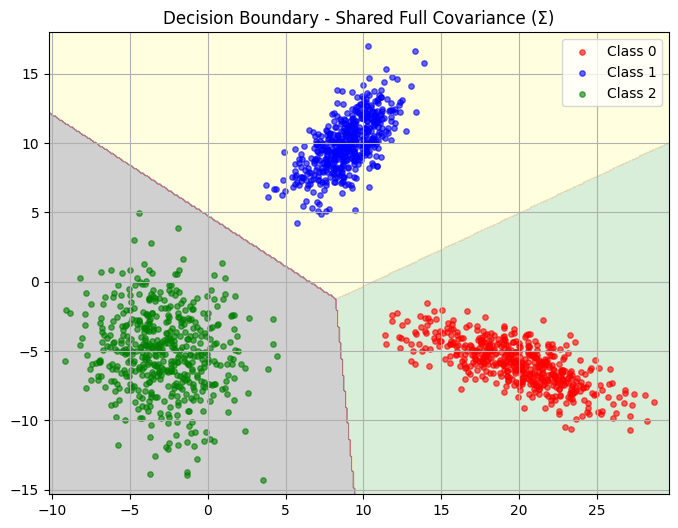

Inference: The decision surface for 'Shared Full Covariance (Σ)' shows how the classifier partitions the space.


=== Diagonal Covariance per Class ===
Confusion Matrix:
 [[150   0   0]
 [  0 150   0]
 [  0   0 150]]
Accuracy: 1.000
Class 0 - Precision: 1.000, Recall: 1.000, F1-score: 1.000
Class 1 - Precision: 1.000, Recall: 1.000, F1-score: 1.000
Class 2 - Precision: 1.000, Recall: 1.000, F1-score: 1.000
Mean Precision: 1.000
Mean Recall: 1.000
Mean F1-score: 1.000


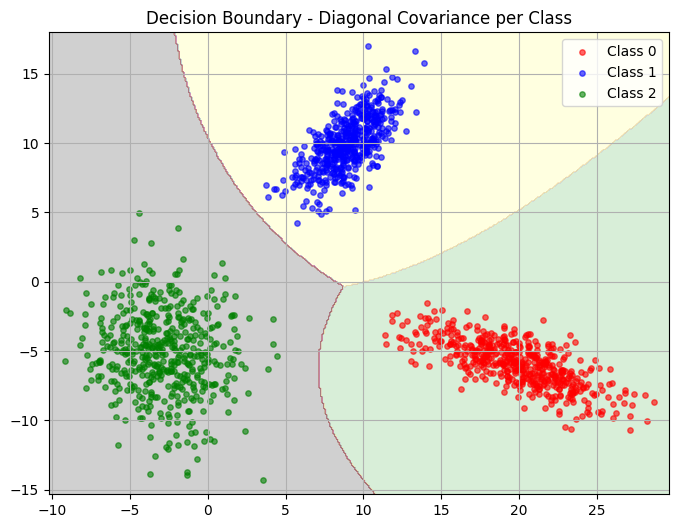

Inference: The decision surface for 'Diagonal Covariance per Class' shows how the classifier partitions the space.


=== Full Covariance per Class ===
Confusion Matrix:
 [[150   0   0]
 [  0 150   0]
 [  0   0 150]]
Accuracy: 1.000
Class 0 - Precision: 1.000, Recall: 1.000, F1-score: 1.000
Class 1 - Precision: 1.000, Recall: 1.000, F1-score: 1.000
Class 2 - Precision: 1.000, Recall: 1.000, F1-score: 1.000
Mean Precision: 1.000
Mean Recall: 1.000
Mean F1-score: 1.000


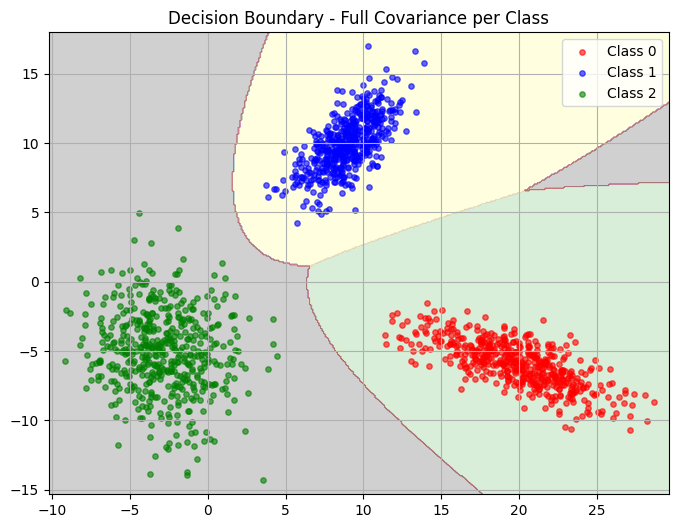

Inference: The decision surface for 'Full Covariance per Class' shows how the classifier partitions the space.



In [10]:
classifiers = [
    ('Shared Isotropic Covariance (σ²I)', 'iso', True),
    ('Shared Full Covariance (Σ)', 'full', True),
    ('Diagonal Covariance per Class', 'diag', False),
    ('Full Covariance per Class', 'full', False),
]

for clf_name, mode, shared in classifiers:
    y_pred = bayes_classifier(X_test, means, covs, priors, mode=mode, shared=shared)
    evaluate(y_test, y_pred, clf_name)
    plot_decision_boundary(means, covs, priors, mode=mode, shared=shared, title=clf_name)